In [ ]:
ㅇimport numpy as np
import pandas as pd
from PIL import Image
import os
#from facenet_pytorch import MTCNN
from tqdm import tqdm
from glob import glob
import shutil
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !tar -xvf '/content/drive/MyDrive/project/lfw-deepfunneled.tgz' -C '/content/drive/MyDrive/project/'

In [ ]:
#!git clone https://github.com/elyha7/yoloface.git

In [ ]:
%cd /content/drive/MyDrive/project/yoloface

/content/drive/MyDrive/project/yoloface


In [ ]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 39.3 MB 128.5 MB/s 
     |████████████████████████████████| 285 kB 64.5 MB/s 
     |████████████████████████████████| 303 kB 95.9 MB/s 
     |████████████████████████████████| 10.3 MB 54.5 MB/s 
ERROR: Could not find a version that satisfies the requirement torch==1.10.1+cu113 (from versions: 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1, 1.13.0)
ERROR: No matching distribution found for torch==1.10.1+cu113


In [ ]:
pip install thop==0.0.31.post2005241907

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached thop-0.0.31.post2005241907-py3-none-any.whl (8.7 kB)


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu');device

device(type='cuda', index=0)

In [ ]:
from face_detector import YoloDetector

model = YoloDetector(#target_size=720, 
                     device=device,min_face=83)


cuda:0
/content/drive/MyDrive/project/yoloface/weights/yolov5n_state_dict.pt


In [ ]:
%cd /content/drive/MyDrive/project

/content/drive/MyDrive/project


In [ ]:
def load_image(img):
  image = Image.open(img)
  image = image.resize((256,256))
  return image

In [ ]:
root_path = './lfw-deepfunneled'
detection_path = './lfw_yoloface'

#LFW Dataset label명(이름)
root = sorted(os.listdir(root_path))

#alignment저장위치에 폴더생성

# for name in root:
#   os.makedirs(os.path.join(detection_path, name), exist_ok=True)

In [ ]:
# 총 5749명의 인물 > 5749개 폴더 생성
#detection_path = './lfw_detection'
# n=0
# for i in os.listdir(detection_path):
#   n+=1
# print(f'총 {n}개의 이미지 폴더 생성')

총 5749개의 이미지 폴더 생성


In [ ]:
# 2개 이상 있는 총 이미지 수 : 9104
not_detected = []
with tqdm(total=9104, leave=False) as pbar:     
  for name_idx in range(len(root)):
      
      if name_idx == len(root):
          break
      # 이미지폴더의 이름 리스트
      image_path = sorted(os.listdir(os.path.join(root_path, root[name_idx])))
      if len(image_path)<2:
        continue
      os.makedirs(os.path.join(detection_path, root[name_idx]), exist_ok=True)
      for index in range(len(image_path)):
          # a는 저장된 이미지의 이름
          a = image_path[index]

          # 이미지 경로 os.path.join(root_path, root[name_idx], a)
          input_img = np.array(load_image(os.path.join(root_path, root[name_idx], a)))
          
          #try:
          bboxes, points = model.predict(input_img)
          # detection[0]은 bounding box 좌표
          try:
            x,y,w,h = bboxes[0][0]
            try:
              if x>150:
                print(f'bounding box x over 150 : {os.path.join(root_path, root[name_idx], a)}')
                x,y,w,h=bboxes[0][1]
            except:
              pass
            img = input_img[y:h, x:w]
            detected_img = Image.fromarray(img)
          #save 경로 확인
            detected_img.save(os.path.join(detection_path, root[name_idx], a))
          #print(f'{a} save')
            pbar.update(1)
          except:
            print(f'{os.path.join(root_path, root[name_idx], a)} not detected')
            not_detected.append(os.path.join(root_path, root[name_idx], a))
            pbar.update(1)

  1%|          | 150/13233 [02:03<3:07:43,  1.16it/s]

bounding box x over 150 : ./lfw-deepfunneled/Aldo_Paredes/Aldo_Paredes_0002.jpg


  1%|          | 162/13233 [02:13<3:08:42,  1.15it/s]

bounding box x over 150 : ./lfw-deepfunneled/Alejandro_Toledo/Alejandro_Toledo_0003.jpg


  7%|▋         | 918/13233 [11:35<2:47:10,  1.23it/s]

bounding box x over 150 : ./lfw-deepfunneled/Bill_Paxton/Bill_Paxton_0001.jpg


  8%|▊         | 1013/13233 [12:45<2:41:40,  1.26it/s]

bounding box x over 150 : ./lfw-deepfunneled/Boris_Berezovsky/Boris_Berezovsky_0001.jpg


  9%|▉         | 1171/13233 [14:46<2:20:51,  1.43it/s]

bounding box x over 150 : ./lfw-deepfunneled/Carlos_Ortega/Carlos_Ortega_0003.jpg


  9%|▉         | 1188/13233 [14:58<2:15:54,  1.48it/s]

bounding box x over 150 : ./lfw-deepfunneled/Carmen_Electra/Carmen_Electra_0005.jpg


  9%|▉         | 1207/13233 [15:11<2:26:26,  1.37it/s]

bounding box x over 150 : ./lfw-deepfunneled/Carrie-Anne_Moss/Carrie-Anne_Moss_0003.jpg


 10%|▉         | 1284/13233 [16:07<2:21:47,  1.40it/s]

bounding box x over 150 : ./lfw-deepfunneled/Charles_Moose/Charles_Moose_0003.jpg


 10%|▉         | 1296/13233 [16:14<2:06:16,  1.58it/s]

bounding box x over 150 : ./lfw-deepfunneled/Charles_Schumer/Charles_Schumer_0002.jpg


 10%|█         | 1337/13233 [16:43<2:23:25,  1.38it/s]

bounding box x over 150 : ./lfw-deepfunneled/Chok_Tong_Goh/Chok_Tong_Goh_0001.jpg


 10%|█         | 1375/13233 [17:11<2:04:14,  1.59it/s]

bounding box x over 150 : ./lfw-deepfunneled/Christine_Todd_Whitman/Christine_Todd_Whitman_0005.jpg


 11%|█▏        | 1507/13233 [18:11<05:29, 35.56it/s]

bounding box x over 150 : ./lfw-deepfunneled/Colin_Powell/Colin_Powell_0046.jpg


 12%|█▏        | 1637/13233 [18:14<04:20, 44.59it/s]

bounding box x over 150 : ./lfw-deepfunneled/Colin_Powell/Colin_Powell_0175.jpg


 13%|█▎        | 1719/13233 [18:32<2:06:46,  1.51it/s]

bounding box x over 150 : ./lfw-deepfunneled/Costas_Simitis/Costas_Simitis_0001.jpg


 15%|█▍        | 1943/13233 [20:49<1:50:41,  1.70it/s]

bounding box x over 150 : ./lfw-deepfunneled/Dianne_Feinstein/Dianne_Feinstein_0001.jpg


 16%|█▋        | 2182/13233 [22:07<1:48:54,  1.69it/s]

bounding box x over 150 : ./lfw-deepfunneled/Eduard_Shevardnadze/Eduard_Shevardnadze_0002.jpg


 17%|█▋        | 2266/13233 [22:57<2:14:39,  1.36it/s]

bounding box x over 150 : ./lfw-deepfunneled/Elsa_Zylberstein/Elsa_Zylberstein_0004.jpg


 18%|█▊        | 2321/13233 [23:30<1:45:29,  1.72it/s]

bounding box x over 150 : ./lfw-deepfunneled/Erika_Harold/Erika_Harold_0003.jpg


 18%|█▊        | 2341/13233 [23:42<1:46:27,  1.71it/s]

bounding box x over 150 : ./lfw-deepfunneled/Ethan_Hawke/Ethan_Hawke_0004.jpg


 21%|██        | 2789/13233 [26:29<03:53, 44.76it/s]

bounding box x over 150 : ./lfw-deepfunneled/George_W_Bush/George_W_Bush_0176.jpg


 22%|██▏       | 2894/13233 [26:31<03:40, 46.81it/s]

bounding box x over 150 : ./lfw-deepfunneled/George_W_Bush/George_W_Bush_0276.jpg


 24%|██▎       | 3139/13233 [26:37<03:41, 45.58it/s]

bounding box x over 150 : ./lfw-deepfunneled/George_W_Bush/George_W_Bush_0530.jpg
bounding box x over 150 : ./lfw-deepfunneled/Geraldine_Chaplin/Geraldine_Chaplin_0002.jpg


 25%|██▌       | 3349/13233 [27:43<1:34:07,  1.75it/s]

./lfw-deepfunneled/Goldie_Hawn/Goldie_Hawn_0002.jpg not detected


 26%|██▌       | 3396/13233 [28:12<1:35:24,  1.72it/s]

bounding box x over 150 : ./lfw-deepfunneled/Gray_Davis/Gray_Davis_0006.jpg


 27%|██▋       | 3550/13233 [29:43<1:33:45,  1.72it/s]

bounding box x over 150 : ./lfw-deepfunneled/Hamid_Karzai/Hamid_Karzai_0019.jpg


 27%|██▋       | 3607/13233 [30:17<1:32:40,  1.73it/s]

bounding box x over 150 : ./lfw-deepfunneled/Harrison_Ford/Harrison_Ford_0004.jpg


 27%|██▋       | 3625/13233 [30:27<1:37:44,  1.64it/s]

bounding box x over 150 : ./lfw-deepfunneled/Harvey_Weinstein/Harvey_Weinstein_0002.jpg


 27%|██▋       | 3639/13233 [30:36<1:33:26,  1.71it/s]

bounding box x over 150 : ./lfw-deepfunneled/Heather_Mills/Heather_Mills_0002.jpg


 28%|██▊       | 3764/13233 [31:52<1:58:39,  1.33it/s]

bounding box x over 150 : ./lfw-deepfunneled/Hu_Jintao/Hu_Jintao_0011.jpg


 29%|██▊       | 3776/13233 [31:59<1:32:16,  1.71it/s]

bounding box x over 150 : ./lfw-deepfunneled/Hugh_Grant/Hugh_Grant_0008.jpg


 29%|██▊       | 3777/13233 [32:00<1:32:21,  1.71it/s]

bounding box x over 150 : ./lfw-deepfunneled/Hugh_Grant/Hugh_Grant_0009.jpg


 32%|███▏      | 4205/13233 [36:18<1:30:23,  1.66it/s]

bounding box x over 150 : ./lfw-deepfunneled/Jean-Marc_de_La_Sabliere/Jean-Marc_de_La_Sabliere_0002.jpg


 32%|███▏      | 4223/13233 [36:29<1:28:27,  1.70it/s]

bounding box x over 150 : ./lfw-deepfunneled/Jean_Charest/Jean_Charest_0005.jpg


 32%|███▏      | 4248/13233 [36:43<1:27:06,  1.72it/s]

bounding box x over 150 : ./lfw-deepfunneled/Jean_Chretien/Jean_Chretien_0013.jpg


 33%|███▎      | 4418/13233 [38:26<1:30:00,  1.63it/s]

bounding box x over 150 : ./lfw-deepfunneled/Jennifer_Lopez/Jennifer_Lopez_0010.jpg


 34%|███▍      | 4550/13233 [39:45<1:25:00,  1.70it/s]

bounding box x over 150 : ./lfw-deepfunneled/Jimmy_Carter/Jimmy_Carter_0001.jpg


 36%|███▋      | 4798/13233 [42:16<1:35:45,  1.47it/s]

bounding box x over 150 : ./lfw-deepfunneled/John_Negroponte/John_Negroponte_0004.jpg


 39%|███▊      | 5098/13233 [45:13<1:18:35,  1.73it/s]

bounding box x over 150 : ./lfw-deepfunneled/Julianna_Margulies/Julianna_Margulies_0002.jpg


 40%|███▉      | 5230/13233 [46:32<1:17:38,  1.72it/s]

bounding box x over 150 : ./lfw-deepfunneled/Kamal_Kharrazi/Kamal_Kharrazi_0002.jpg


 40%|████      | 5302/13233 [47:15<1:22:54,  1.59it/s]

bounding box x over 150 : ./lfw-deepfunneled/Ken_Watanabe/Ken_Watanabe_0001.jpg


 40%|████      | 5309/13233 [47:19<1:18:11,  1.69it/s]

bounding box x over 150 : ./lfw-deepfunneled/Kenneth_Evans/Kenneth_Evans_0001.jpg


 41%|████      | 5406/13233 [48:15<1:15:46,  1.72it/s]

bounding box x over 150 : ./lfw-deepfunneled/Kofi_Annan/Kofi_Annan_0010.jpg


 42%|████▏     | 5547/13233 [49:39<1:13:35,  1.74it/s]

bounding box x over 150 : ./lfw-deepfunneled/Laura_Bush/Laura_Bush_0032.jpg


 42%|████▏     | 5581/13233 [49:59<1:12:13,  1.77it/s]

bounding box x over 150 : ./lfw-deepfunneled/Lea_Fastow/Lea_Fastow_0002.jpg


 44%|████▍     | 5791/13233 [52:02<1:14:22,  1.67it/s]

bounding box x over 150 : ./lfw-deepfunneled/Ludivine_Sagnier/Ludivine_Sagnier_0004.jpg


 44%|████▍     | 5819/13233 [52:19<1:14:18,  1.66it/s]

bounding box x over 150 : ./lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0004.jpg


 44%|████▍     | 5839/13233 [52:31<1:12:43,  1.69it/s]

bounding box x over 150 : ./lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0024.jpg


 45%|████▍     | 5894/13233 [53:03<1:13:49,  1.66it/s]

bounding box x over 150 : ./lfw-deepfunneled/Mahathir_Mohamad/Mahathir_Mohamad_0002.jpg


 46%|████▌     | 6036/13233 [54:26<1:09:09,  1.73it/s]

bounding box x over 150 : ./lfw-deepfunneled/Mark_Hurlbert/Mark_Hurlbert_0004.jpg


 46%|████▌     | 6064/13233 [54:42<1:08:42,  1.74it/s]

bounding box x over 150 : ./lfw-deepfunneled/Martha_Beatriz_Roque/Martha_Beatriz_Roque_0001.jpg


 47%|████▋     | 6158/13233 [55:37<1:10:17,  1.68it/s]

bounding box x over 150 : ./lfw-deepfunneled/Matthew_Perry/Matthew_Perry_0003.jpg


 47%|████▋     | 6249/13233 [56:30<1:06:43,  1.74it/s]

bounding box x over 150 : ./lfw-deepfunneled/Michael_Bloomberg/Michael_Bloomberg_0012.jpg


 47%|████▋     | 6264/13233 [56:39<1:07:46,  1.71it/s]

bounding box x over 150 : ./lfw-deepfunneled/Michael_Chang/Michael_Chang_0001.jpg


 51%|█████▏    | 6789/13233 [1:01:54<1:04:04,  1.68it/s]

bounding box x over 150 : ./lfw-deepfunneled/Nursultan_Nazarbayev/Nursultan_Nazarbayev_0002.jpg


 52%|█████▏    | 6836/13233 [1:02:23<1:03:31,  1.68it/s]

bounding box x over 150 : ./lfw-deepfunneled/Ozzy_Osbourne/Ozzy_Osbourne_0002.jpg


 52%|█████▏    | 6837/13233 [1:02:23<1:03:39,  1.67it/s]

bounding box x over 150 : ./lfw-deepfunneled/Ozzy_Osbourne/Ozzy_Osbourne_0003.jpg


 52%|█████▏    | 6910/13233 [1:03:07<1:00:51,  1.73it/s]

bounding box x over 150 : ./lfw-deepfunneled/Paul_Bremer/Paul_Bremer_0013.jpg


 53%|█████▎    | 6981/13233 [1:03:50<1:04:27,  1.62it/s]

bounding box x over 150 : ./lfw-deepfunneled/Paul_Wellstone/Paul_Wellstone_0002.jpg


 54%|█████▎    | 7095/13233 [1:05:00<1:00:09,  1.70it/s]

bounding box x over 150 : ./lfw-deepfunneled/Phan_Van_Khai/Phan_Van_Khai_0002.jpg


 54%|█████▍    | 7123/13233 [1:05:16<59:55,  1.70it/s]  

bounding box x over 150 : ./lfw-deepfunneled/Pierre_Pettigrew/Pierre_Pettigrew_0002.jpg


 54%|█████▍    | 7142/13233 [1:05:28<1:02:03,  1.64it/s]

bounding box x over 150 : ./lfw-deepfunneled/Prince_Naruhito/Prince_Naruhito_0001.jpg


 55%|█████▍    | 7214/13233 [1:06:10<59:07,  1.70it/s]

bounding box x over 150 : ./lfw-deepfunneled/Rainer_Schuettler/Rainer_Schuettler_0005.jpg


 55%|█████▌    | 7312/13233 [1:07:10<59:41,  1.65it/s]  

bounding box x over 150 : ./lfw-deepfunneled/Renee_Zellweger/Renee_Zellweger_0015.jpg


 57%|█████▋    | 7489/13233 [1:08:57<57:17,  1.67it/s]

bounding box x over 150 : ./lfw-deepfunneled/Rob_Schneider/Rob_Schneider_0001.jpg


 57%|█████▋    | 7533/13233 [1:09:25<1:01:10,  1.55it/s]

bounding box x over 150 : ./lfw-deepfunneled/Robert_Evans/Robert_Evans_0003.jpg


 58%|█████▊    | 7674/13233 [1:10:50<56:13,  1.65it/s]

bounding box x over 150 : ./lfw-deepfunneled/Ron_Howard/Ron_Howard_0001.jpg


 62%|██████▏   | 8169/13233 [1:15:51<51:59,  1.62it/s]

bounding box x over 150 : ./lfw-deepfunneled/Steve_Waugh/Steve_Waugh_0002.jpg


 62%|██████▏   | 8175/13233 [1:15:55<50:08,  1.68it/s]

bounding box x over 150 : ./lfw-deepfunneled/Steven_Spielberg/Steven_Spielberg_0002.jpg


 63%|██████▎   | 8393/13233 [1:18:07<47:50,  1.69it/s]

bounding box x over 150 : ./lfw-deepfunneled/Tom_Craddick/Tom_Craddick_0001.jpg


 67%|██████▋   | 8822/13233 [1:21:04<43:48,  1.68it/s]

bounding box x over 150 : ./lfw-deepfunneled/Vicente_Fox/Vicente_Fox_0017.jpg


 67%|██████▋   | 8850/13233 [1:21:21<44:35,  1.64it/s]

bounding box x over 150 : ./lfw-deepfunneled/Vin_Diesel/Vin_Diesel_0001.jpg


 68%|██████▊   | 8937/13233 [1:22:17<46:04,  1.55it/s]

bounding box x over 150 : ./lfw-deepfunneled/Vojislav_Kostunica/Vojislav_Kostunica_0007.jpg


 68%|██████▊   | 9053/13233 [1:23:30<46:38,  1.49it/s]

bounding box x over 150 : ./lfw-deepfunneled/Woody_Allen/Woody_Allen_0004.jpg


 68%|██████▊   | 9060/13233 [1:23:34<42:23,  1.64it/s]

bounding box x over 150 : ./lfw-deepfunneled/Xanana_Gusmao/Xanana_Gusmao_0003.jpg


 69%|██████▊   | 9083/13233 [1:23:49<43:35,  1.59it/s]

bounding box x over 150 : ./lfw-deepfunneled/Yashwant_Sinha/Yashwant_Sinha_0002.jpg


 69%|██████▉   | 9104/13233 [1:24:02<40:57,  1.68it/s]

bounding box x over 150 : ./lfw-deepfunneled/Yoko_Ono/Yoko_Ono_0004.jpg


In [ ]:
print(f'Detection fail: {len(not_detected)}')

Detection fail: 1


## Save

In [ ]:
folder = './lfw_yoloface'
num=2

In [ ]:
max = []
def jpg(folder,num):
  names=[]
  train_jpg=[]
  #save_dict={}
  for f in os.listdir(folder):
    a=os.listdir(folder+'/'+f)
    if len(a)>=num:
      names.append(f)

  for i in names:
    path=folder+'/'+i
    data = sorted(glob(os.path.join(path, '*')))
    max.append(len(data))
    for j in data:
      train_jpg.append(j)

  return names,train_jpg


In [ ]:
names,train_jpg = jpg(folder,num)

In [ ]:
print(f'총 {len(names)}명, {len(train_jpg)}개의 사진')

총 1680명, 9155개의 사진


In [ ]:
save_path = './lfw'

In [ ]:
# for i in names:
#   os.makedirs(f'{save_path}/{i}', exist_ok=True)

In [ ]:
img_num = 0
for i in names:
  os.makedirs(f'{save_path}/{i}', exist_ok=True)
  path=folder+'/'+i
  data = sorted(glob(os.path.join(path, '*')))
  num=1
  
  for j in data:
    #print(j)
    #if num<=10:
    shutil.copyfile(j, save_path+'/'+i+'/'+str(num)+'.jpg')
    #image=Image.open(j)
    #image.save(save_path+'/'+i+'/'+str(num)+'.jpg')
    num=num+1
    if img_num%100==0:
      print(f'{img_num}번째 이미지')
    img_num+=1

0번째 이미지
100번째 이미지
200번째 이미지
300번째 이미지
400번째 이미지
500번째 이미지
600번째 이미지
700번째 이미지
800번째 이미지
900번째 이미지
1000번째 이미지
1100번째 이미지
1200번째 이미지
1300번째 이미지
1400번째 이미지
1500번째 이미지
1600번째 이미지
1700번째 이미지
1800번째 이미지
1900번째 이미지
2000번째 이미지
2100번째 이미지
2200번째 이미지
2300번째 이미지
2400번째 이미지
2500번째 이미지
2600번째 이미지
2700번째 이미지
2800번째 이미지
2900번째 이미지
3000번째 이미지
3100번째 이미지
3200번째 이미지
3300번째 이미지
3400번째 이미지
3500번째 이미지
3600번째 이미지
3700번째 이미지
3800번째 이미지
3900번째 이미지
4000번째 이미지
4100번째 이미지
4200번째 이미지
4300번째 이미지
4400번째 이미지
4500번째 이미지
4600번째 이미지
4700번째 이미지
4800번째 이미지
4900번째 이미지
5000번째 이미지
5100번째 이미지
5200번째 이미지
5300번째 이미지
5400번째 이미지
5500번째 이미지
5600번째 이미지
5700번째 이미지
5800번째 이미지
5900번째 이미지
6000번째 이미지
6100번째 이미지
6200번째 이미지
6300번째 이미지
6400번째 이미지
6500번째 이미지
6600번째 이미지
6700번째 이미지
6800번째 이미지
6900번째 이미지
7000번째 이미지
7100번째 이미지
7200번째 이미지
7300번째 이미지
7400번째 이미지
7500번째 이미지
7600번째 이미지
7700번째 이미지
7800번째 이미지
7900번째 이미지
8000번째 이미지
8100번째 이미지
8200번째 이미지
8300번째 이미지
8400번째 이미지
8500번째 이미지
8600번째 이미지
8700번째 이미지
8800번째 이미지
8900번째 이미지
9000번째 이미지
9100번째 이미지


In [ ]:
sum_img = 0
for f in os.listdir('./lfw'):
  for n in os.listdir(f'./lfw/{f}'):
    sum_img+=1

print('총 이미지 수 : ',sum_img)

총 이미지 수 :  9155


## a

In [ ]:
a

'Abdullah_Gul_0004.jpg'

In [ ]:
x,y,w,h = bboxes[0][0]

Image.fromarray(orgimg[y:h, x:w]).size

(99, 128)

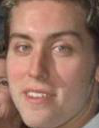

In [ ]:
Image.fromarray(orgimg[y:h, x:w])

In [ ]:
pip install facenet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 33.6 MB/s 


device(type='cuda', index=0)

In [ ]:
mtcnn = MTCNN(device=device)

In [ ]:
def load_image(img):
  image = Image.open(img)
  return image

In [ ]:
# https://github.com/timesler/facenet-pytorch

root_path = './lfw-deepfunneled'
detection_path = './lfw_detection'

#LFW Dataset label명(이름)
root = sorted(os.listdir(root_path))

#alignment저장위치에 폴더생성
not_detected = []
for name in root:
  os.makedirs(os.path.join(detection_path, name), exist_ok=True)


In [ ]:
# 총 5749명의 인물 > 5749개 폴더 생성
detection_path = './lfw_detection'
n=0
for i in os.listdir(detection_path):
  n+=1
print(f'총 {n}개의 이미지 폴더 생성')

총 5749개의 이미지 폴더 생성


In [ ]:
# 총 이미지 수 : 13233

with tqdm(total=13233) as pbar:     
  for name_idx in range(len(root)):
      
      if name_idx == len(root):
          break
      # 이미지폴더의 이름 리스트
      image_path = sorted(os.listdir(os.path.join(root_path, root[name_idx])))
      
      for index in range(len(image_path)):
          # a는 저장된 이미지의 이름
          a = image_path[index]

          # 이미지 경로 os.path.join(root_path, root[name_idx], a)
          input_img = load_image(os.path.join(root_path, root[name_idx], a))
          
          try:
            detection = mtcnn.detect(input_img)
            # detection[0]은 bounding box 좌표
            for i in detection[0]:
              if i[0]>0 and i[1]>0 and i[2]>0 and i[3]>0:
                x=i[0]
                y=i[1]
                w=i[2]
                h=i[3]
                break
              else:
                continue
            img = np.array(input_img)[int(y):int(h), int(x):int(w)]
            detected_img = Image.fromarray(img)
            #save 경로 확인
            detected_img.save(os.path.join(detection_path, root[name_idx], a))
            #print(f'{a} save')
            pbar.update(1)
          except:
            not_detected.append(os.path.join(root_path, root[name_idx], a))
            pbar.update(1)

100%|██████████| 13233/13233 [07:58<00:00, 27.67it/s]


In [ ]:
print(f'Detection fail: {len(not_detected)}')

Detection fail: 1
